In [52]:
from time import perf_counter
import matplotlib.pyplot as plt
import networkx as nx


###Part 1

In [44]:
initial_ls = []
for i in range(0,500):
    initial_ls.append(i)
initial_ls.reverse()
print(initial_ls)


[499, 498, 497, 496, 495, 494, 493, 492, 491, 490, 489, 488, 487, 486, 485, 484, 483, 482, 481, 480, 479, 478, 477, 476, 475, 474, 473, 472, 471, 470, 469, 468, 467, 466, 465, 464, 463, 462, 461, 460, 459, 458, 457, 456, 455, 454, 453, 452, 451, 450, 449, 448, 447, 446, 445, 444, 443, 442, 441, 440, 439, 438, 437, 436, 435, 434, 433, 432, 431, 430, 429, 428, 427, 426, 425, 424, 423, 422, 421, 420, 419, 418, 417, 416, 415, 414, 413, 412, 411, 410, 409, 408, 407, 406, 405, 404, 403, 402, 401, 400, 399, 398, 397, 396, 395, 394, 393, 392, 391, 390, 389, 388, 387, 386, 385, 384, 383, 382, 381, 380, 379, 378, 377, 376, 375, 374, 373, 372, 371, 370, 369, 368, 367, 366, 365, 364, 363, 362, 361, 360, 359, 358, 357, 356, 355, 354, 353, 352, 351, 350, 349, 348, 347, 346, 345, 344, 343, 342, 341, 340, 339, 338, 337, 336, 335, 334, 333, 332, 331, 330, 329, 328, 327, 326, 325, 324, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309, 308, 307, 306, 305, 304, 303, 302, 301, 300,

In [45]:
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

In [46]:
def partition(arr, low, high):
    """Return a pivot element for Quicksort."""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1

    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot

def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)

In [47]:
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result

def mergesort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergesort(left)
    right = mergesort(right)
    return list(merge(left, right))

In [48]:
bubble_time = {}
quick_time = {}
merge_time = {}

# Value of n chosen based on the limitations of the machine to calculate n factorials in a reasonable time
n = 2

In [49]:
# Calculates average time for n runs of N
def avg_time(ls):
    return sum(ls) / len(ls)

In [50]:
search_ls = initial_ls.copy()

while len(search_ls) != 1:
    bubble_time_ls = []
    #used to find the average value of n runs for each value of num to reduce noise
    for i in range(10):
        start_timer = perf_counter()
        bubble_sort(search_ls)
        bubble_time_ls.append(perf_counter() - start_timer)
    bubble_time[len(search_ls)] = avg_time(bubble_time_ls)

    quick_time_ls = []
    #used to find the average value of n runs for each value of num to reduce noise
    for i in range(10):
        start_timer = perf_counter()
        quicksort(search_ls)
        quick_time_ls.append(perf_counter() - start_timer)
    quick_time[len(search_ls)] = avg_time(quick_time_ls)

    merge_time_ls = []
    #used to find the average value of n runs for each value of num to reduce noise
    for i in range(10):
        start_timer = perf_counter()
        mergesort(search_ls)
        merge_time_ls.append(perf_counter() - start_timer)
    merge_time[len(search_ls)] = avg_time(merge_time_ls)

    search_ls.pop()

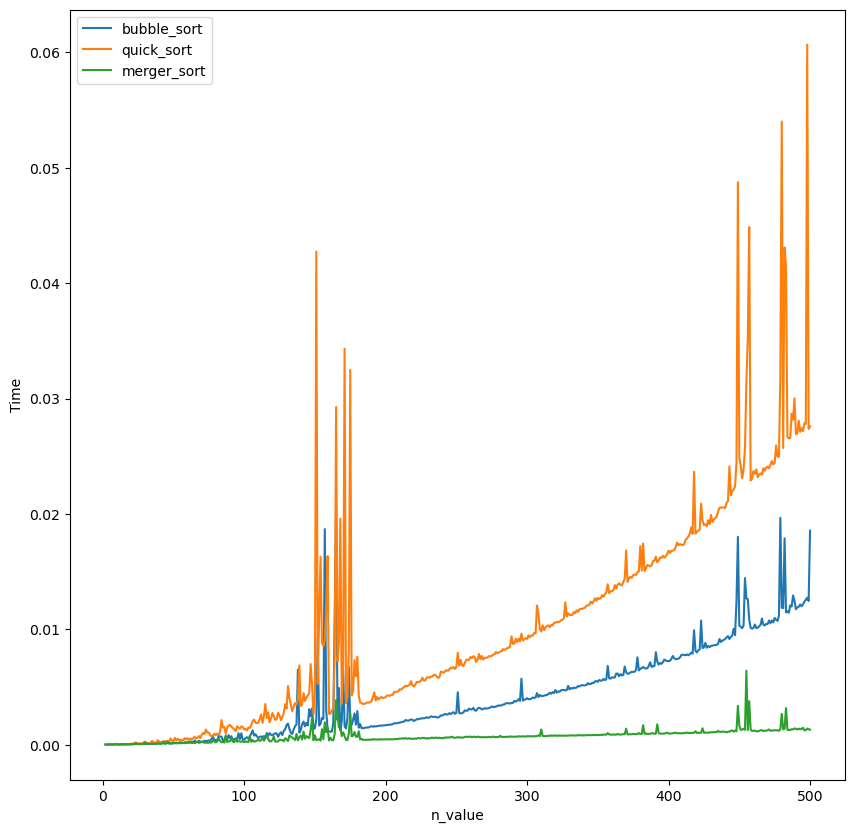

In [51]:
# plots the results
plt.figure(figsize=(10,10))
plt.plot(list(bubble_time.keys()), list(bubble_time.values()), label="bubble_sort")
plt.plot(list(quick_time.keys()), list(quick_time.values()), label="quick_sort")
plt.plot(list(merge_time.keys()), list(merge_time.values()), label="merger_sort")
plt.ylabel("Time")
plt.xlabel("n_value")
plt.legend()
plt.show()

###Part 2

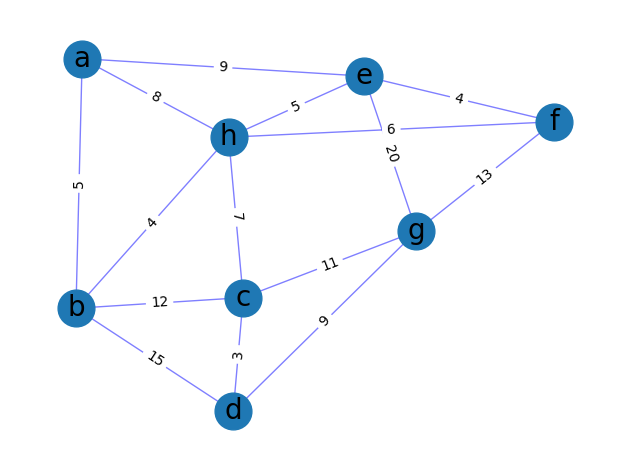

In [66]:
G = nx.Graph()
G.add_node('a')
G.add_node('b')
G.add_node('c')
G.add_node('d')
G.add_node('e')
G.add_node('f')
G.add_node('g')
G.add_node('h')

G.add_edge('a', 'b', weight='5')
G.add_edge('a', 'e', weight='9')
G.add_edge('a', 'h', weight='8')
G.add_edge('b', 'd', weight='15')
G.add_edge('b', 'c', weight='12')
G.add_edge('b', 'h', weight='4')
G.add_edge('c', 'd', weight='3')
G.add_edge('c', 'h', weight='7')
G.add_edge('c', 'g', weight='11')
G.add_edge('d', 'g', weight='9')
G.add_edge('e', 'h', weight='5')
G.add_edge('e', 'f', weight='4')
G.add_edge('e', 'g', weight='20')
G.add_edge('f', 'g', weight='13')
G.add_edge('f', 'h', weight='6')

pos = nx.spring_layout(G, seed=1)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="b")

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()